In [1]:
import numpy
import emoji
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output
from IPython.display import Image
import sys
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import json
from wv import processStr
from cnn import getEmojiNVocab, getXData

Using TensorFlow backend.


This is the beginning part of the EmoChat demo. As you can see here, we are going to use Python 2 to execute our solution.

In [2]:
print "Now let's get started!"

Now let's get started!


Ever since the first generation of iPhone came out, the use of applications has developed faster than any other period in history. Among them, one particularly interesting aspect is the emergence of emojis and its vast adoptation in instant messaging. With the help of ```emoji``` package in Python, here are one example of commonly-used ones:

In [3]:
print emoji.emojize('Now we can see you are :smile: hahaha.', use_aliases=True)

Now we can see you are 😄 hahaha.


As a matter of fact, the famous "Face with Tears of Joy" is even included by the Oxford Dictionary in 2017, so the importance of such expressions as an aid to pure text messages is clearly demonstrated. But sometimes it may take a while for you to find the wanted emoji right? Especially when you have a full list of available choices.

So in this project, we aim to build an emoji suggestion model based on the text input. When you have finished inputing your messages and felt like one additional cutie would add more sense, our model will be helpful then.

We have trained a 3-layer CNN (Convolutional Neural Network) for classification of emojis, using the data obtained from Twitter. Basically we train the CNN using the Tweets - Emoji pairs (580,000 pieces in total), and evaluate with additional 4,300 pairs. The general architecture of the model can be found as follows:

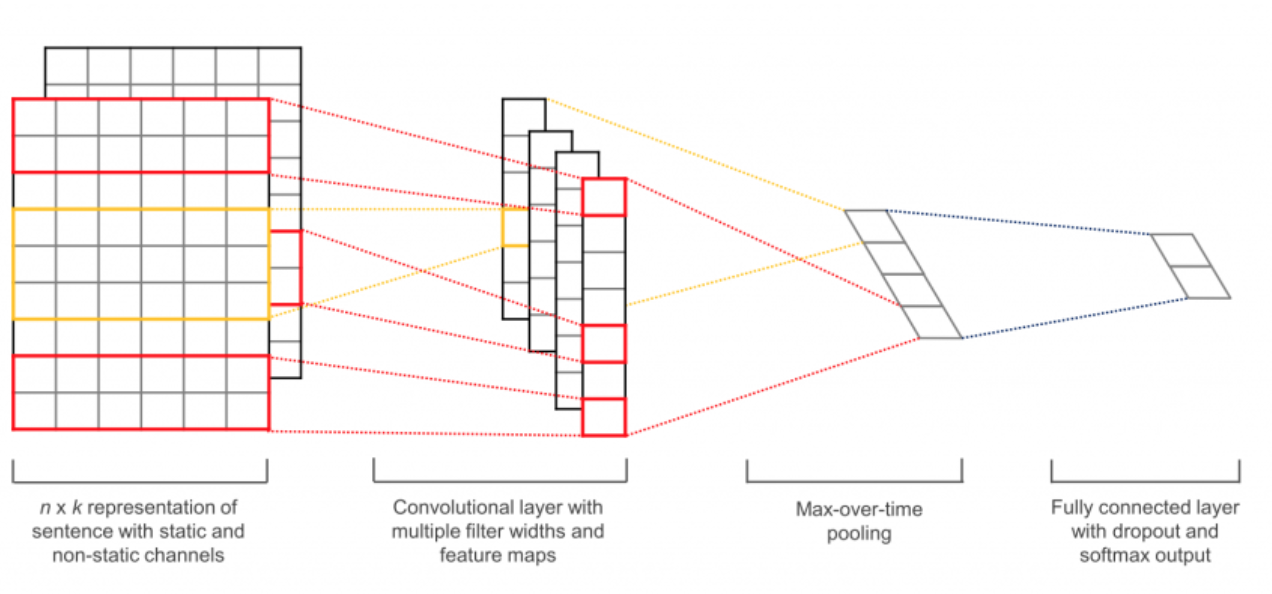

In [4]:
Image("cnn.png", width = 600)

There are 3 filter sizes in our model: 3, 4, and 5; in each convolution layer (size) there will be 200 different filters applied. The dropout rate is set to be 0.5. We have also trained a 50-dimension word embedding using the ```gensim``` lib with the Twitter data, and construct the CNN model based on it. With the above settings, we reached an accuracy of 38%, while the state of the art performance is around 40% using CNN classification.

We have also trained a separate LSTM model, where 2 Bidirectional LSTM layers are used, each with 64 neurons and 0.2 dropout rate. The structure of the model can be found in the following graph:

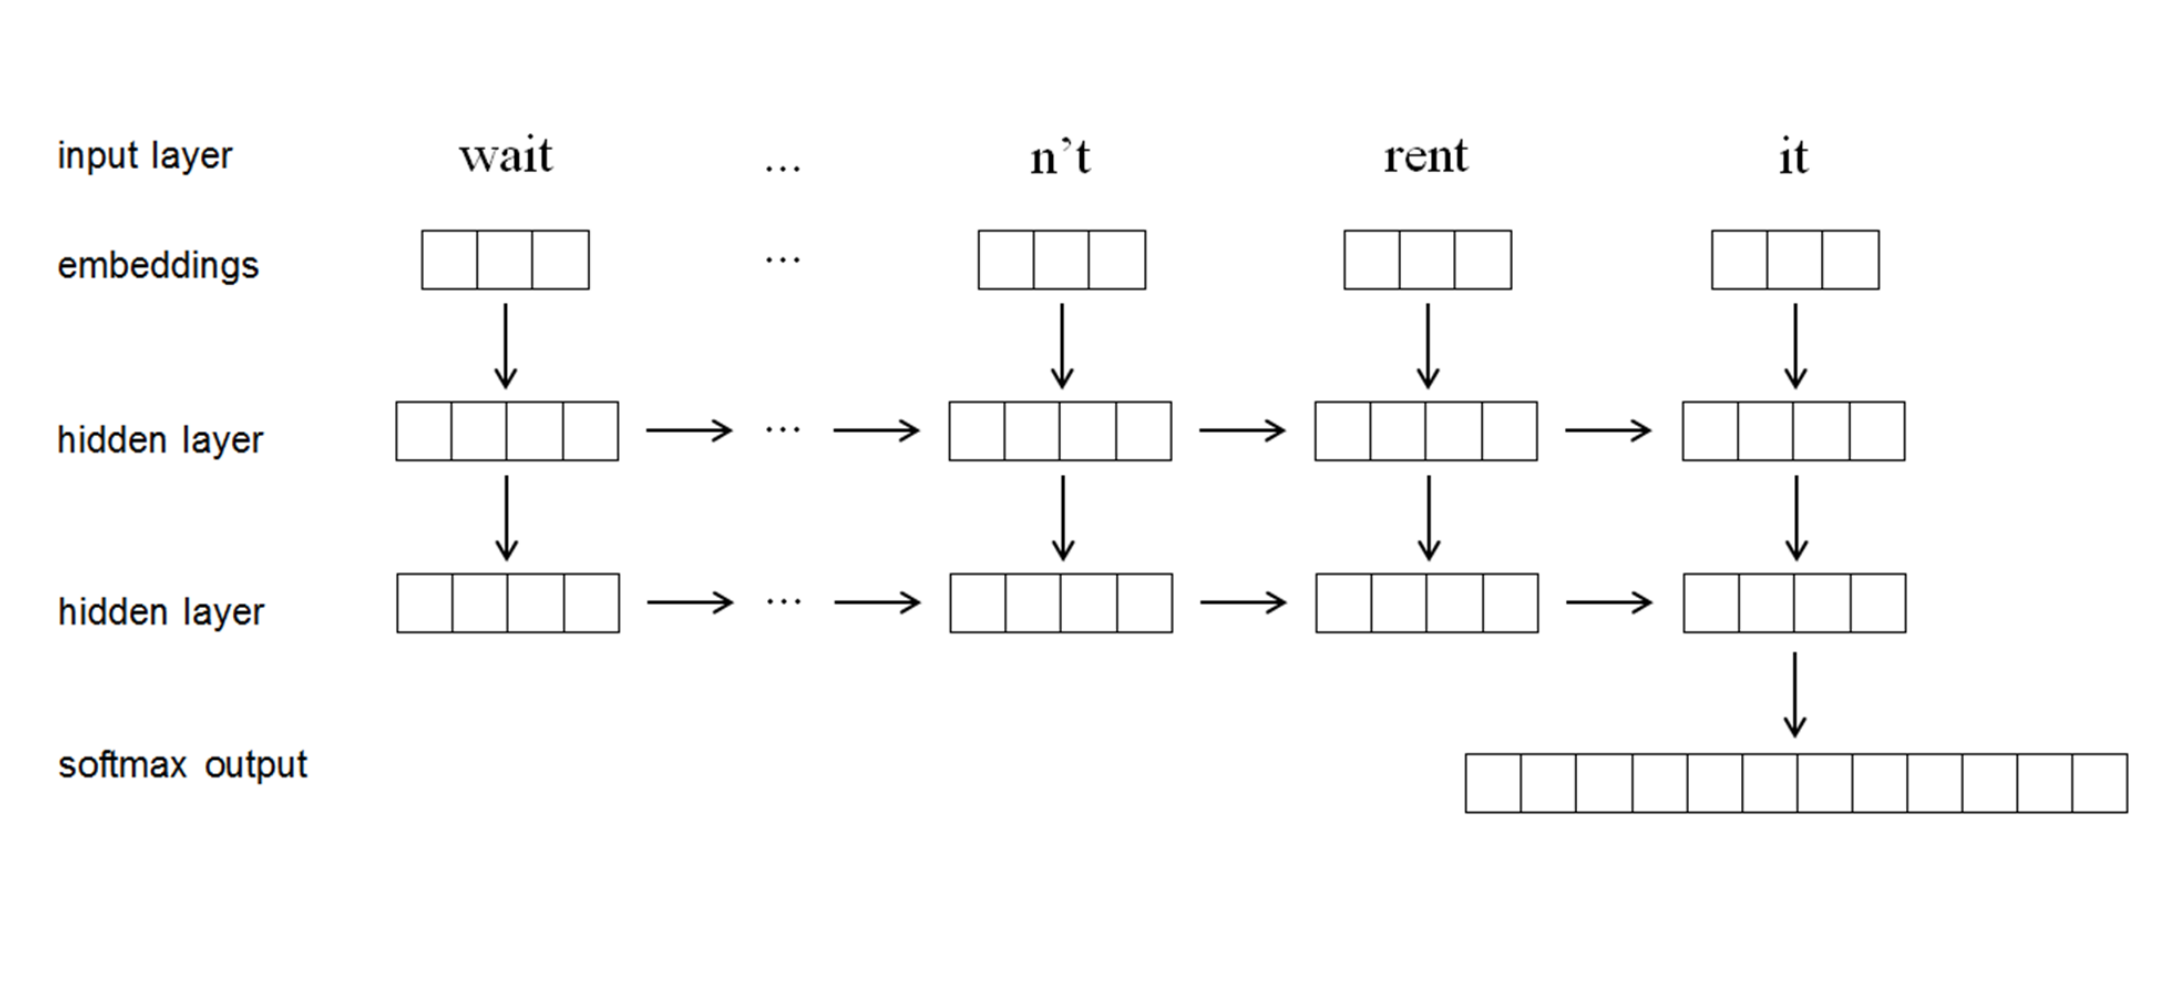

In [5]:
Image("bilstm.png", width = 700)

To make our model more fun and user-centric, we have also made this Jupyter Notebook so that you can play with our model, input a sentence, and see what is the predicted emoji for your input. Try out the following examples; to start with, let's import/define the model and other necessary utilities we have trained previously:

In [6]:
model = load_model('emo.h5')
idEmojiMap, wordIdMap, maxLength, emojiTokenMap = getEmojiNVocab()
print maxLength
print type(maxLength)

def makePrediction(textInput):
    processedStr = processStr(textInput).split()
    data = getXData(maxLength, wordIdMap, processedStr)
#     print data
    predicted = model.predict(data)[0]
#     print predicted
    predictedY = predicted.argmax(axis=-1)
#     print predictedY
    tk = idEmojiMap[str(predictedY)][:-1]
    emoStr = emojiTokenMap[tk]
    return emoStr

37
<type 'int'>


In [7]:
text = widgets.Text()
submitBtn = widgets.Button(description = "Submit!")
display(text)
display(submitBtn)

def handleText(sender):
    print text.value
    
def btnClicked(b):
    sys.stdout.write('\r')
    ### Do the processing of text.value here ###
    # Bug: adding the extra spaces to avoid the longer string appearance "age" 
    returnedString = ""
    if text.value:
        inputStr = str(text.value)
        emoStr = makePrediction(inputStr)
        returnedString = "The suggested emoji is: " + emoji.emojize(emoStr, use_aliases = True) + "      "
    else:
        returnedString = "Please enter a valid message!"
#     returnedString = "The suggested emoji is: " + emoji.emojize(emoStr, use_aliases = True) + "   " if text.value else "Please enter a valid message!"
    # sys.stdout.write(text.value)
    sys.stdout.write(returnedString)
    
    ### Finished processing of text.value ###
    sys.stdout.flush()
    
# text.on_submit(handleText)
submitBtn.on_click(btnClicked)

Text(value=u'')

Button(description=u'Submit!', style=ButtonStyle())

The suggested emoji is: 😂      